<a href="https://colab.research.google.com/github/oakrom/PythonNeuralNetworkRepo/blob/main/GANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Joriy populyatsiyadagi har bir yechimning fitness qiymatini hisoblash.
    # Fitnes funktsiyasi har bir kirish va unga mos keladigan vazn o'rtasidagi mahsulotlarning yig'indisini hisoblab chiqadi.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Hozirgi avlodning eng yaxshi shaxslarini ota-ona sifatida tanlash, kelajak avlodning avlodlarini etishtirish.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # Xossalar almashinuvi ikki ota-ona o'rtasida sodir bo'ladigan nuqta. Odatda, bu markazda.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Birinchi bo'lib turmush qurgan ota-onaning ko'rsatkichi.
        parent1_idx = k%parents.shape[0]
        # Ikkinchi bo'lib turmush qurgan ota-onaning ko'rsatkichi.
        parent2_idx = (k+1)%parents.shape[0]
        # Yangi nasl genlarining birinchi yarmi birinchi ota-onadan olinadi.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # Yangi nasl genlarining ikkinchi yarmi ikkinchi ota-onadan olinadi.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutatsiya num_mutations argumenti bilan belgilangan qator genlarni o'zgartiradi. O'zgarishlar tasodifiy.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # Genga qo'shilishi kerak bo'lgan tasodifiy qiymat.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

[[ 0.80873393 -1.29807907 -0.03274635 -3.08317096  2.90405151 -0.14191628]
 [ 0.53219248 -1.75040814 -3.16182153  0.97104482 -3.38282289 -2.10131075]
 [ 2.48886036 -3.99634842 -2.63416968 -3.80676795 -1.29720038  2.05439307]
 [ 2.39331485 -1.93228012  3.50026553  1.61756732  2.68864647 -3.2387977 ]
 [-3.53615255 -3.43401941  0.2803118  -0.96798181 -2.6046216  -0.75485143]
 [ 2.68877266  1.64004715 -2.28262337 -3.2458668   0.84100268 -2.81827901]
 [-2.69803789  0.56509102 -3.76891994 -3.93460968  2.34042398  2.55886998]
 [-3.25453518 -2.16822186  2.54824499  0.34264306 -0.24519386  0.78043295]]
Generation :  0
Fitness
[-40.97693327  46.50564731  -5.69173859  19.42382362  21.06325021
 -12.74863765 -82.55795441   0.97947329]
Best result :  46.50564730707773
Parents
[[ 0.53219248 -1.75040814 -3.16182153  0.97104482 -3.38282289 -2.10131075]
 [-3.53615255 -3.43401941  0.2803118  -0.96798181 -2.6046216  -0.75485143]
 [ 2.39331485 -1.93228012  3.50026553  1.61756732  2.68864647 -3.2387977 ]
 [

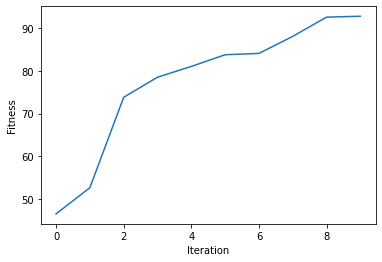

In [31]:
import numpy

# Tenglamaning kirish qiymatlari
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Biz optimallashtirmoqchi bo'lgan og'irliklar soni.
num_weights = len(equation_inputs)

"""
Genetik algoritm parametrlari:
    Juftliklar pooli o'lchami
    Populatsiya puli o'lchami
"""
sol_per_pop = 8
num_parents_mating = 4

# Populyatsiya o'lchamini belgilash.
pop_size = (sol_per_pop,num_weights) # Populyatsiyada sol_per_pop xromosomasi bo'ladi, bu erda har bir xromosomada og'irlik genlari mavjud.
#Boshlang'ich populyatsiyani yaratish
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

best_outputs = []
num_generations = 10
for generation in range(num_generations):
    print("Generation : ", generation)
    # Populyatsiyada har bir xromosomaning mosligini o'lchash.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # Joriy takrorlashda eng yaxshi natija.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Uylantirish uchun populyatsiyaning eng yaxshi ota-onalarini tanlash.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Xossalar almashinuvi yordamida keyingi avlodni yaratish.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    #Mutatsiyadan foydalangan holda naslga ba'zi o'zgarishlarni qo'shish.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Ota-onalar va avlodlar asosida yangi populyatsiyani yaratish.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Barcha avlodlarni takrorlashdan keyin eng yaxshi echimni olish.
fitness = cal_pop_fitness(equation_inputs, new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

#natijalarni chop etish
import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()